<a href="https://colab.research.google.com/github/BlackPuma075/Cosmo_class_2024/blob/main/CLASS_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install classy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 18.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for classy: filename=classy-3.2.3.2-cp310-cp310-linux_x86_64.whl size=34180944 sha256=6740c27543dad0b390c48f433c5e1a98b173b61ee0b63b91882a431a82dae35e
  Stored in directory: /root/.cache/pip/wheels/1d/53/d6/99853a1577044e4da2a37fc04ff3515d79911e665944af0991
Successfully built classy


In [2]:
from classy import Class

In [3]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# run class
LambdaCDM.compute()

In [4]:
# get all C_l output
cls = LambdaCDM.lensed_cl(2500)
# To check the format of cls
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [5]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

In [6]:
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi

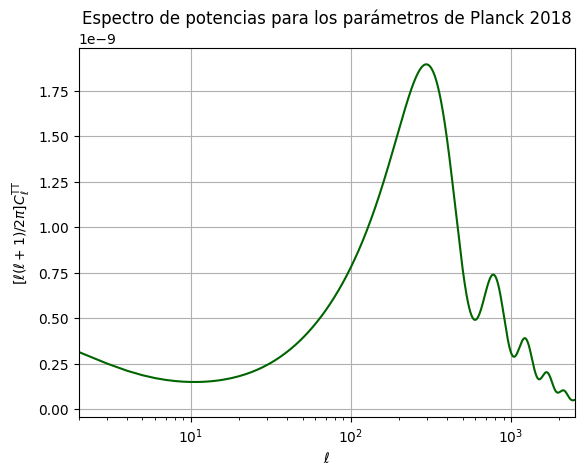

In [7]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi,'-', color = 'darkgreen')
plt.grid()
plt.title('Espectro de potencias para los parámetros de Planck 2018')
plt.savefig('Power spectrum Planck')

In [8]:
#plt.savefig('warmup_cltt.pdf')

In [9]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

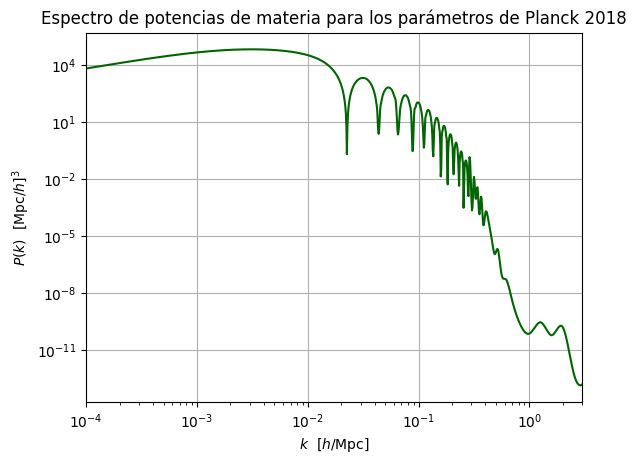

In [10]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'-', color = 'darkgreen')
plt.grid()
plt.title('Espectro de potencias de materia para los parámetros de Planck 2018')
plt.savefig('Matter Power Spectrum Planck')

In [11]:
# optional: reset parameters to default in case you want
# to set different parameters and rerun LambdaCDM.compute()
#LambdaCDM.empty()

In [12]:
import numpy as np

In [13]:
pk_data = np.load('/content/drive/MyDrive/COSMO2024/LCDM_4096_L1000_z0.npy')

pk_data.shape

(4096, 3)

In [14]:
pk_data[:,2:]

array([[637.220398],
       [144.811127],
       [ 36.841   ],
       ...,
       [  4.158386],
       [261.989838],
       [994.93219 ]])

In [15]:
pk_data_cmb = np.loadtxt('/content/drive/MyDrive/COSMO2024/pk_data_cmb')

pk_data_cmb.shape

(8, 3)

In [16]:
pk_d = np.loadtxt('/content/drive/MyDrive/COSMO2024/pk_data')

pk_d.shape

(45, 3)

In [17]:
pk_d

array([[3.28532383e-02, 2.01895714e+04, 2.28884495e+03],
       [3.88266488e-02, 1.62795309e+04, 1.61659733e+03],
       [4.47999109e-02, 1.24002348e+04, 1.22337194e+03],
       [5.07731729e-02, 1.16258653e+04, 1.00446852e+03],
       [5.67465835e-02, 1.12170817e+04, 8.81179431e+02],
       [6.27198455e-02, 1.01822134e+04, 7.97658850e+02],
       [6.86931075e-02, 9.20319722e+03, 7.18472223e+02],
       [7.46665181e-02, 9.99729100e+03, 6.35247153e+02],
       [8.06397802e-02, 8.86079213e+03, 5.62669972e+02],
       [8.66131907e-02, 7.23393243e+03, 4.90248618e+02],
       [9.25864528e-02, 6.52599965e+03, 4.26887224e+02],
       [9.85597148e-02, 5.66200769e+03, 3.66131100e+02],
       [1.04533125e-01, 5.22169728e+03, 3.27347858e+02],
       [1.10506387e-01, 4.58280434e+03, 2.98135830e+02],
       [1.16479798e-01, 4.45415535e+03, 2.80146399e+02],
       [1.22453060e-01, 4.35172184e+03, 2.68186879e+02],
       [1.28426322e-01, 4.17456684e+03, 2.59968067e+02],
       [1.34399733e-01, 3.70141

In [18]:
pk_data_cmb[:,2:]

array([[29718.23508042],
       [23178.56291001],
       [24217.76858246],
       [27623.39044522],
       [26054.3448236 ],
       [23519.91306722],
       [17815.61387799],
       [14099.81745267]])

In [19]:
#kk =10**np.linspace(-4,np.log10(20),10000)
#Pk = [] # P(k) in (Mpc/h)**3
#h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
#for k in kk:
#    Pk.append(LambdaCDM.pk(k*h,0)*h**3) # function .pk(k,z)

In [20]:
#plt.scatter(pk_d[:,0:1], pk_d[:,1:2], label = '$P_{0}$')
#plt.scatter(pk_d[:,0:1], pk_d[:,2:], label = '$P_{2}$')
#plt.scatter(pk_data_cmb[:,0:1], pk_data_cmb[:,2:], label = '$P_{0}$')
#plt.scatter(pk_data_cmb[:,0:1], pk_data_cmb[:,1:2], label = '$P_{0}$')
#plt.grid()
#plt.legend()
#plt.xlabel('k')
#plt.ylabel('$P_{l}$')

In [21]:
%%shell
wget -O COM_PowerSpect_CMB-TT-binned_R3.01.txt "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-binned_R3.01.txt"

--2024-05-20 01:00:40--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 7143 (7.0K) [application/x-binary]
Saving to: ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’

COM_PowerSpect_CMB- 100%[===================>]   6.98K  --.-KB/s    in 0s      

2024-05-20 01:00:41 (497 MB/s) - ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’ saved [7143/7143]



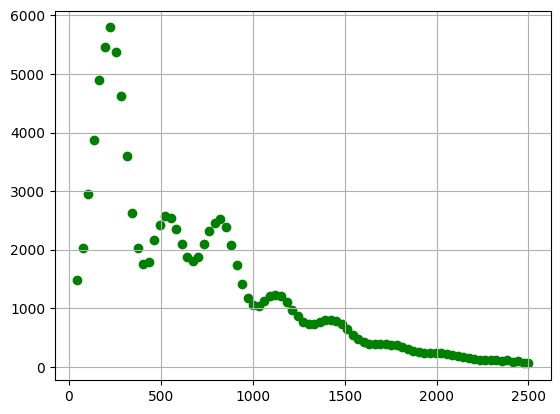

In [22]:
data=np.loadtxt("/content/COM_PowerSpect_CMB-TT-binned_R3.01.txt").T
plt.scatter(data[0],data[1],color =  'green')
plt.grid()

In [23]:
# Inicializar la clase "Class"
LambdaCDM = Class()
# dar parametros cosmologicos
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_h/Mpc':1000,'z_pk':'0',})
# ejecutar class
LambdaCDM.compute()

In [24]:
# Obtener los coeficientes Cl
cls = LambdaCDM.lensed_cl(2500)
# checar el formato
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [25]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]


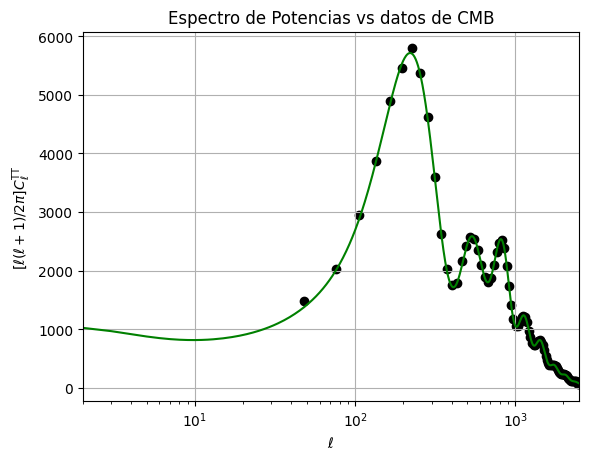

In [26]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi*1e12*2.7225**2,'g-')
plt.scatter(data[0],data[1], color = 'black')
plt.grid()
plt.title('Espectro de Potencias vs datos de CMB')
plt.savefig('PEPLANCKCMB')

In [27]:
# get P(k) at redhsift z=0
import numpy as np
kk =10**np.linspace(-4,np.log10(20),10000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0)*h**3) # function .pk(k,z)

In [28]:
pk_data=np.loadtxt("/content/drive/MyDrive/COSMO2024/pk_data").T
pk_data_cmb=np.loadtxt("/content/drive/MyDrive/COSMO2024/pk_data_cmb").T

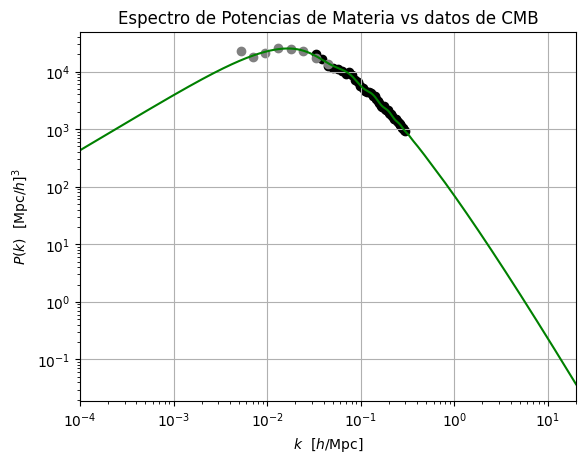

In [29]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'g-')
plt.scatter(pk_data[0],pk_data[1], color = 'black',marker =  'o')
plt.scatter(pk_data_cmb[0],pk_data_cmb[1],color = 'gray',marker =  'o')
plt.grid()
plt.title('Espectro de Potencias de Materia vs datos de CMB')
plt.savefig('MPEPLANCKCMB')

In [30]:
r_arr=np.arange(1,200,1)
xi = np.zeros(len(r_arr))
factor = np.power(kk,2) * Pk / (kk*2*np.pi**2)
for i in range(len(r_arr)):
    IntegrandXi = factor * np.sin(kk*r_arr[i]) / r_arr[i]
    xi[i] = np.trapz(IntegrandXi,kk)

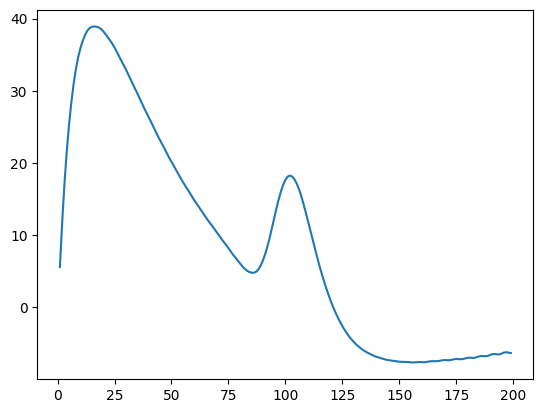

In [31]:
plt.plot(r_arr, r_arr**2*xi)

In [32]:
from scipy.integrate import quad

In [33]:
Pk0=np.vectorize(LambdaCDM.pk)

In [34]:
Corrfunc = []
func = lambda k:(1/(2.*np.pi*r))*k*Pk0(k,0)*h**3*np.sin(k*r)
for r in r_arr:
  Corrfunc.append(quad(func,1e-4,6)[0])

<ipython-input-34-224ade227994>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  Corrfunc.append(quad(func,1e-4,6)[0])
<ipython-input-34-224ade227994>:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  Corrfunc.append(quad(func,1e-4,6)[0])


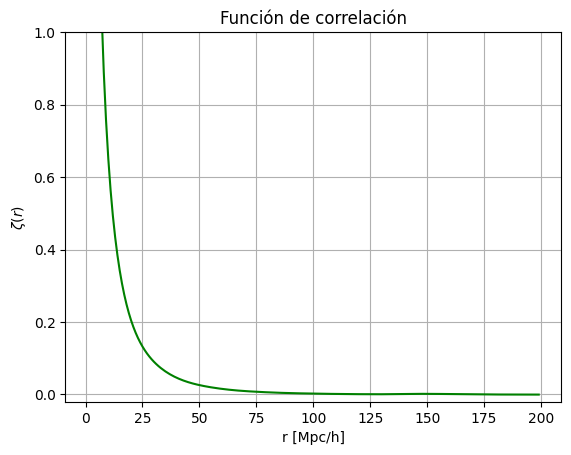

In [35]:
plt.plot(r_arr,Corrfunc, color = 'green')
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\zeta(r) $')
plt.ylim(-0.02,1)
plt.grid()
plt.title('Función de correlación')
plt.savefig('CorrelationFunction')

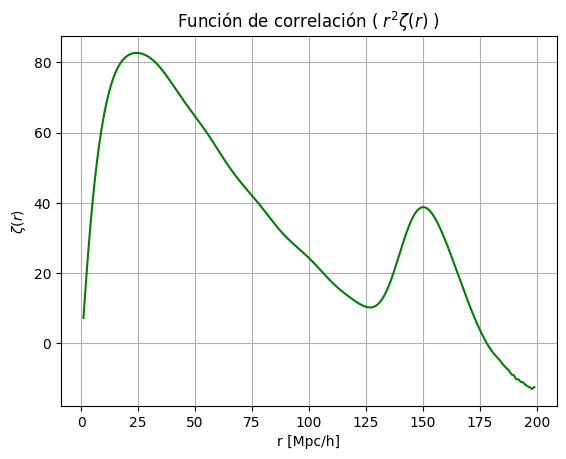

In [36]:
plt.plot(r_arr,r_arr**2*Corrfunc, color = 'green')
plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\zeta(r) $')
plt.grid()
plt.title('Función de correlación ( $r^{2}\zeta(r)$ )')
plt.savefig('CorrelationFunctionrsqrd')

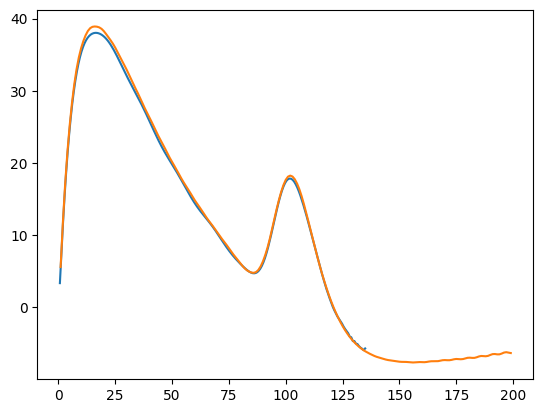

In [37]:

plt.plot(r_arr*h,(r_arr)**2*Corrfunc*h**2)

plt.plot(r_arr, r_arr**2*xi )

In [38]:
# Inicializar la clase "Class"
LambdaCDM = Class()
# dar parametros cosmologicos
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.67810,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.01}) #fixing tau_reio to 0.01
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_h/Mpc':1000,'z_pk':'0',})
# ejecutar class
LambdaCDM.compute()

In [39]:
# Obtener los coeficientes Cl
cls = LambdaCDM.lensed_cl(2500)
# checar el formato
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [40]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

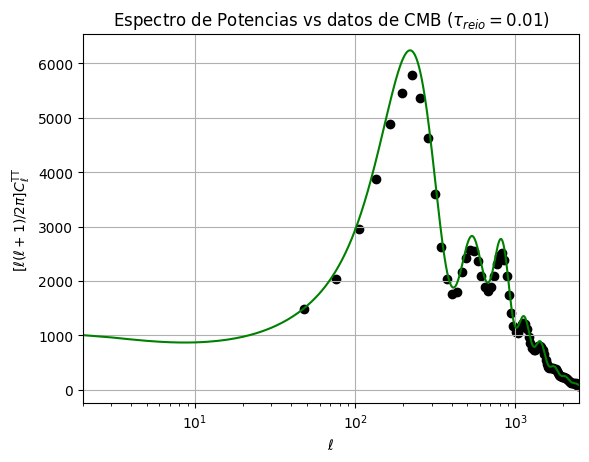

In [41]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi*1e12*2.7225**2,'g-')
plt.scatter(data[0],data[1], color = 'black')
plt.grid()
plt.title(r'Espectro de Potencias vs datos de CMB ($\tau_{reio} = 0.01$)')
plt.savefig('PETAU')

In [42]:
# get P(k) at redhsift z=0
import numpy as np
kk =10**np.linspace(-4,np.log10(20),10000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0)*h**3) # function .pk(k,z)

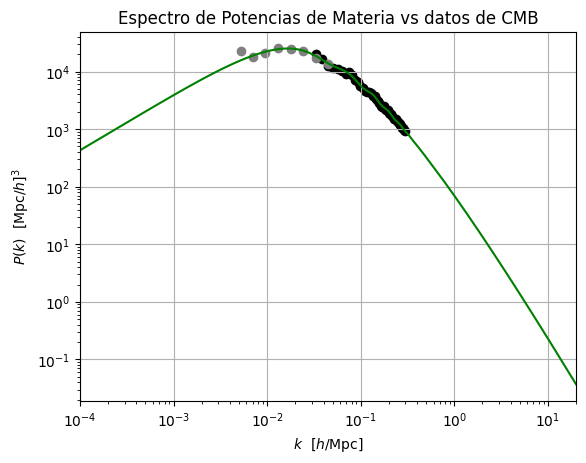

In [43]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'g-')
plt.scatter(pk_data[0],pk_data[1], color = 'black',marker =  'o')
plt.scatter(pk_data_cmb[0],pk_data_cmb[1],color = 'gray',marker =  'o')
plt.grid()
plt.title('Espectro de Potencias de Materia vs datos de CMB')
plt.savefig('MPETAU')

In [44]:
# Inicializar la clase "Class"
LambdaCDM = Class()
# dar parametros cosmologicos
LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.1201075,'h':0.7,'A_s':2.100549e-09,'n_s':0.9660499,'tau_reio':0.05430842}) #fixing h to 0.7
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_h/Mpc':1000,'z_pk':'0',})
# ejecutar class
LambdaCDM.compute()

In [45]:
# Obtener los coeficientes Cl
cls = LambdaCDM.lensed_cl(2500)
# checar el formato
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

In [46]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]
clEE = cls['ee'][2:]
clPP = cls['pp'][2:]

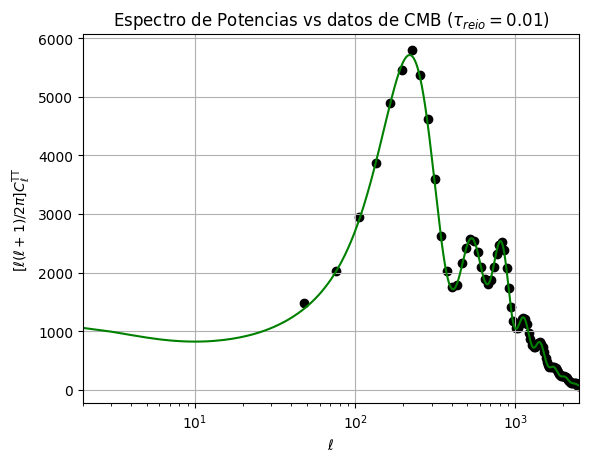

In [50]:
# plot C_l^TT
plt.figure(1)
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi*1e12*2.7225**2,'g-')
plt.scatter(data[0],data[1], color = 'black')
plt.grid()
plt.title(r'Espectro de Potencias vs datos de CMB ($\tau_{reio} = 0.01$)')
plt.savefig('PEH7')

In [48]:
# get P(k) at redhsift z=0
import numpy as np
kk =10**np.linspace(-4,np.log10(20),10000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0)*h**3) # function .pk(k,z)

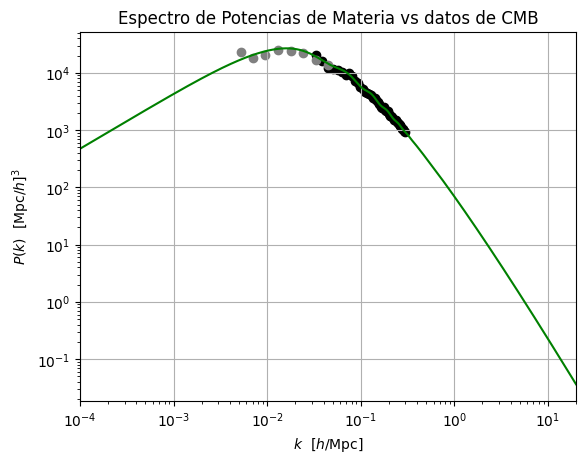

In [51]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'g-')
plt.scatter(pk_data[0],pk_data[1], color = 'black',marker =  'o')
plt.scatter(pk_data_cmb[0],pk_data_cmb[1],color = 'gray',marker =  'o')
plt.grid()
plt.title('Espectro de Potencias de Materia vs datos de CMB')
plt.savefig('MPEh7')